# Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset

In [2]:
data = pd.read_csv('breast-cancer-data.csv')

In [3]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

            ...             radius_worst  texture_worst  perimeter_worst  \
0           ...                    25.38          17.33           184.60   
1           ...                    24.99          23.41           158.80   
2           ...                    23.57          25.53           152.50   
3           ...                    14.91          26.50            98.87   
4           ...                    22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 32 columns]

### Get the description regarding the dataset

In [4]:
data.shape

(569, 32)

## Analyzing data with HeatMap or Correlation

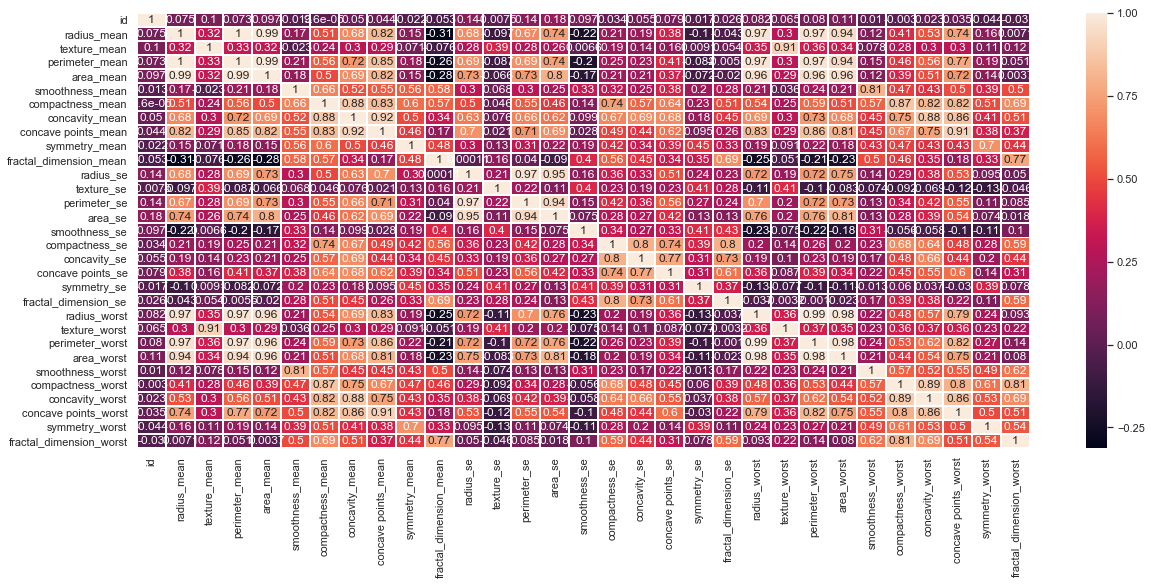

In [7]:
sns.set(rc={'figure.figsize':(20, 8)})
sns.heatmap(data.corr(), annot=True, linewidths=1)

In [8]:
## converting diagnosis to numerical

In [9]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [13]:
data['diagnosis'] = data['diagnosis'].map({'M': 0, 'B': 1})

## Performing Dimensionality Reduction to reduce feature

Rather than dropping columns from our dataset, to reduce the dimensionality, we can try to combine these features in some way to maximize the amount of information. This is exactly the goal of Principal Component Analysis.

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=10)

In [18]:
output_data = data['diagnosis'].copy()

In [19]:
training_data = data.copy()

In [20]:
training_data.drop(columns=['diagnosis'], inplace=True)

In [21]:
training_data.head()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean           ...             radius_worst  texture_worst  \
0         0.2419           ...                    25.38          17.33   
1         0.1812           ...                    24.99          23.41   
2         0.2069           ...                    23.57          25.53   
3         0.2597           ...                    14.91          26.50   
4         0.1809           ...                    22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 31 columns]

In [22]:
pca_data = pca.fit_transform(training_data)

In [30]:
pca_data = pd.DataFrame(pca_data)

In [31]:
pca_data

0            1           2          3          4          5  \
0   -2.952953e+07  1176.590041 -294.913581  51.007560  -8.517369  31.505780   
1   -2.952931e+07  1285.749615   14.460640 -33.559074  17.863095  -4.529803   
2    5.392907e+07   965.498486   39.839016  -2.959418   4.170464  -0.292485   
3    5.397647e+07  -437.551998  -66.111302   6.675288 -11.771096   7.422798   
4    5.398657e+07   900.073378  190.054022  -0.136151   8.496560   7.796324   
5   -2.952805e+07  -195.025042  -80.392184  -0.441067  -2.851036   7.490976   
6   -2.952747e+07   837.810389  -48.133838 -30.583090   0.330865   3.042155   
7    5.408637e+07   -55.528436  -73.064125  10.042951  -7.127272   3.214518   
8   -2.952685e+07  -174.709074  -42.656350  -5.320329 -10.514773   1.636717   
9    5.412917e+07  -268.742181  -64.200014  -5.584265 -12.683931  -8.510689   
10  -2.952620e+07   321.287621  -18.472678 -15.835766  -4.605799  -5.515452   
11   5.423817e+07   393.838153 -108.314445 -11.283000  -4.263188   7.530592   
12  -2.952561e+07   651.153332  166.409189  38.612716 -19.896062   7.039498   
13  -2.952545e+07    79.689308  111.041597  -7.653822  -4.613231  -2.909416   
14   5.429557e+07  -226.938504   30.814632 -14.129330 -14.076361   2.155188   
15   5.442717e+07    25.409456  -28.091928 -14.405077 -18.762818  -0.936798   
16  -2.952343e+07   252.413655 -109.131265  -6.462427  -4.350896   0.586274   
17   5.449017e+07   416.731877 -101.252057 -12.903542  -7.988390   4.255740   
18  -2.952282e+07  1631.587304 -271.612175 -12.974268   4.929303   0.718354   
19  -2.186141e+07  -179.323393   11.883770  -5.612192   3.621770   6.616023   
20  -2.186118e+07  -272.750148   14.213664  -9.619354   1.509743   5.786411   
21  -2.186101e+07  -671.319873  -32.715123  15.434621  12.599025   1.550341   
22  -2.186070e+07   124.847656   -9.656534  -2.068043  -4.691836  15.823605   
23  -2.952032e+07  1890.250040 -261.629087 -44.540153  14.707677 -11.047120   
24  -2.951928e+07  1290.131480 -480.446767  -3.073679  -1.923894   7.895019   
25  -2.951920e+07   651.417106  -80.733992  36.351860  -9.803216  18.188496   
26  -2.951907e+07    25.192157  -17.621046 -20.482619 -14.620263   3.882352   
27  -2.951905e+07   694.408933  103.976067  15.973245  -1.341510  -0.439743   
28  -2.951886e+07   390.270587 -136.117067 -17.828006 -22.101133   7.234977   
29  -2.951863e+07   470.305808   76.607770  -4.196499   1.632766   9.539389   
..            ...          ...         ...        ...        ...        ...   
539 -2.945047e+07  -799.471728  -74.564805  19.422565   3.022236 -17.858954   
540 -2.945045e+07  -477.098509    3.550103   9.177749   5.783237   2.215629   
541 -2.945045e+07   -44.202878   37.964940 -14.463035 -11.724581  -1.152135   
542 -2.945019e+07   -23.085246   39.217904 -10.646097  -7.052189  -6.181372   
543 -2.944954e+07  -259.688402   29.928901  -6.979926  -9.070659 -12.881339   
544 -2.944953e+07  -184.680363   39.293875  -5.818027  -2.193152   0.403846   
545 -2.944926e+07  -155.285690    7.832170   1.156161  -3.270264  -4.933726   
546 -2.944925e+07  -580.688067  -25.650241   7.674404   7.165481  -2.696552   
547 -2.944899e+07  -606.531803  -14.860030   3.193100   6.172105  -2.418999   
548 -2.944866e+07  -618.541833  -48.546128  15.197418   3.863706  -6.430084   
549 -2.944837e+07  -456.957317  -56.923078  20.147032  -6.813175  -6.537454   
550 -2.944808e+07  -538.224593   -9.365702  12.613884   2.235093  -5.833423   
551 -2.944805e+07  -508.115935   -6.649635   7.695066  -1.569857  -6.729515   
552 -2.944775e+07  -305.491950   21.906340  -3.187015  -7.446419 -14.306993   
553 -2.944749e+07  -688.441370  -31.577674  18.777705   4.632811  -9.261050   
554 -2.944720e+07  -301.360585   26.896140  -5.458327  -7.512132 -13.537826   
555 -2.944690e+07  -605.676695  -14.597877   9.888427  -4.528761 -15.782569   
556 -2.944687e+07  -619.511191  -17.357440  13.579490   5.367715  -5.405443   
557 -2.944660e+07  -654.163343  -43.481630  27.749726  -4.680014 -

In [23]:
pca.explained_variance_ratio_

array([1.00000000e+00, 2.80767893e-11, 4.67287322e-13, 4.38513839e-14,
       3.49585393e-15, 2.52773507e-15, 1.92217612e-16, 1.15848914e-16,
       2.34949742e-17, 9.94676134e-18])

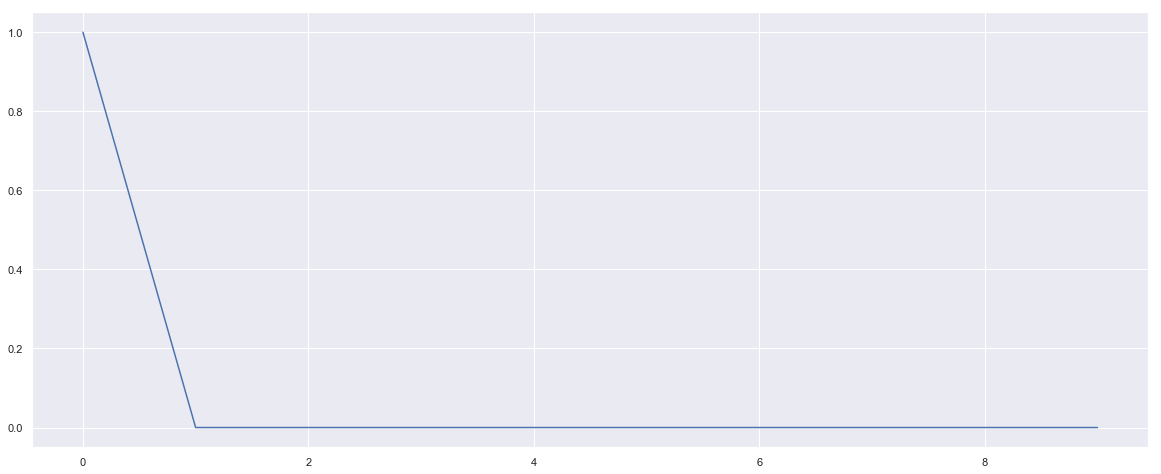

In [24]:
sns.set()
plt.plot(pca.explained_variance_ratio_)

## Making Machine Learning Predictions

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logistic_model = LogisticRegression()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X, x_test, Y, y_test = train_test_split(pca_data, output_data, test_size=0.27, random_state=42)

In [32]:
logistic_model.fit(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
logistic_prediction = logistic_model.predict(x_test)

## Checking accuracy

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [35]:
logistic_score = accuracy_score(y_test, logistic_prediction)
logistic_score

0.948051948051948